# Loan Prediction (Good/Bad) Model

**Author:** Anshita Saxena

&copy; Copyright IBM Corp. 2020

## Introduction
This notebook presents loan prediction, i.e., loan is good or bad through python pandas

#### Importing Libraries

In [1]:
# for managing dataset
import pandas as pd
# for ignoring normal warnings
import warnings
# for ploting the graph
import matplotlib.pyplot as plt
# Use numpy to convert to arrays
import numpy as np
# To see 1000 number of rows and columns of dataset
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
warnings.filterwarnings("ignore")
# For beautiful background of graphs
plt.style.use('fivethirtyeight')
import datetime
# from datetime import datetime, timedelta
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix
import itertools

#### Importing the dataset

In [2]:
account = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\account.csv")
print(account.shape)
account.head(2)

(4500, 4)


,account_id,district_id,frequency,date
0,576,55,POPLATEK MESICNE,930101
1,3818,74,POPLATEK MESICNE,930101


In [3]:
card = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\card.csv")
print(card.shape)
card.head(2)

(892, 4)


,card_id,disp_id,type,issued
0,1005,9285,classic,931107 00:00:00
1,104,588,classic,940119 00:00:00


In [4]:
client = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\client.csv")
print(client.shape)
client.head(2)

(5369, 3)


,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1


In [5]:
disposition = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\disp.csv")
print(disposition.shape)
disposition.head(2)

(5369, 4)


,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER


In [6]:
district = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\district.csv")
print(district.shape)
district.head(2)

(77, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674


In [7]:
loan = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\loan.csv")
print(loan.shape)
loan.head(2)

(682, 7)


,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,B
1,5316,1801,930711,165960,36,4610,A


In [8]:
order = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\order.csv")
print(order.shape)
order.head(2)

(6471, 6)


,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER


In [9]:
transaction = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\trans.csv", sep=";")
print(transaction.shape)
transaction.head(2)

(1056320, 10)


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN


#### Dataset with column names and number of rows and columns

In [10]:
print("ACCOUNT: ", account.columns)
print(account.shape)
print("CARD: ", card.columns)
print(card.shape)
print("CLIENT: ", client.columns)
print(client.shape)
print("DISPOSITION: ", disposition.columns)
print(disposition.shape)
print("DEMOGRAPH: ", district.columns)
print(district.shape)
print("LOAN: ", loan.columns)
print(loan.shape)
print("ORDER: ", order.columns)
print(order.shape)
print("TRANSACTION: ", transaction.columns)
print(transaction.shape)

ACCOUNT:  Index(['account_id', 'district_id', 'frequency', 'date'], dtype='object')
(4500, 4)
CARD:  Index(['card_id', 'disp_id', 'type', 'issued'], dtype='object')
(892, 4)
CLIENT:  Index(['client_id', 'birth_number', 'district_id'], dtype='object')
(5369, 3)
DISPOSITION:  Index(['disp_id', 'client_id', 'account_id', 'type'], dtype='object')
(5369, 4)
DEMOGRAPH:  Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'A16'],
      dtype='object')
(77, 16)
LOAN:  Index(['loan_id', 'account_id', 'date', 'amount', 'duration', 'payments',
       'status'],
      dtype='object')
(682, 7)
ORDER:  Index(['order_id', 'account_id', 'bank_to', 'account_to', 'amount',
       'k_symbol'],
      dtype='object')
(6471, 6)
TRANSACTION:  Index(['trans_id', 'account_id', 'date', 'type', 'operation', 'amount',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')
(1056320, 10)


#### Count of each category in loan_status field

In [11]:
print(loan['status'].value_counts())
# 'A' stands for contract finished, no problems,
# 'B' stands for contract finished, loan not payed,
# 'C' stands for running contract, OK so far,
# 'D' stands for running contract, client in debt
print(loan.shape)

C    403
A    203
D     45
B     31
Name: status, dtype: int64
(682, 7)


In [12]:
ls -l help *.csv

 Volume in drive C is Windows
 Volume Serial Number is 8C6B-C468

 Directory of C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad


 Directory of C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad


 Directory of C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad

18-10-2019  23:18           146,348 account.csv
18-10-2019  23:18            29,796 card.csv
18-10-2019  23:19            84,076 client.csv
18-10-2019  23:19           118,970 disp.csv
18-10-2019  23:20             6,229 district.csv
18-10-2019  23:21            23,613 loan.csv
18-10-2019  23:21           216,547 order.csv
18-10-2019  23:00        69,406,578 trans.csv
               8 File(s)     70,032,157 bytes
               0 Dir(s)  42,579,804,160 bytes free


#### Feature Engineering
###### Function to convert YYmmdd into YYYY-mm-dd

In [13]:
def num2date(x):
    if isinstance(x, str):
        return pd.to_datetime('19'+x, format='%Y%m%d %H:%M:%S')
    else:
        return pd.to_datetime(str(float(x)+19000000.), format='%Y%m%d')  # 19000000 ---- ~~YYmmdd, fill year in ~~

In [14]:
# Account:
account['date'] = account['date'].apply(lambda x: num2date(x))
account['frequency'].replace('POPLATEK MESICNE','monthly_issuance',inplace=True)
account['frequency'].replace('POPLATEK TYDNE','weekly_issuance',inplace=True)
account['frequency'].replace('POPLATEK PO OBRATU','issuance_after_transaction',inplace=True)

In [15]:
# Card:
card['issued'] = card['issued'].apply(lambda x: num2date(x))

#### METHOD 1: By Numerical Computation

In [16]:
client = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\client.csv")
print(client.shape)
print(client.head(2))
#client['MMMM']=client['birth_number']//100                     # Take out the number
#client['MMMMMM']=client['birth_number']//10000*100             # Take out the year
client['MM']=client['birth_number']//100 - client['birth_number']//10000*100
client['gender'] = 'M'                                         # Declare Male if month is less than 50
client.loc[client['MM']>50,'gender'] = 'F'                     # Declare Female if month is less than 50
client.loc[client['gender']=='F','birth_number'] -= 5000       # Subtraction of 50DD factor, DD~~00, to convert into perfect number
client['birth_number'] = client['birth_number'].apply(lambda x: num2date(x))
print("\nMODIFIED DATASET:")
# Taking 4 sec for computation
client.drop(columns={"MM"}, inplace=True)
print(client.head(2))

(5369, 3)
   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1

MODIFIED DATASET:
   client_id birth_number  district_id gender
0          1   1970-12-13           18      F
1          2   1945-02-04            1      M


#### METHOD 2: By String Operation

In [17]:
client = pd.read_csv(r"C:\Users\AnshitaSaxena\Desktop\Notebook\dice-cad\client.csv")
print(client.shape)
print(client.head(2))
client['birth_number'] = client['birth_number'].astype(str)
client['MM'] = client['birth_number'].str.get(2) + client['birth_number'].str.get(3)  # Take out the 2nd & 3rd position values for Month
client['gender'] = 'M'
client['MM'] = client['MM'].astype(int)
client.loc[client['MM']>50,'gender'] = 'F'
client.loc[client['gender']=='F','MM'] -= 50
print("Debug for intermediate step:")
print(client.head(2))
client['MM'] = client.MM.map("{:02}".format)
client['MM'] = client['MM'].astype(str)
# Replace with perfect number
print("How format looks like now: debug-")
print(client.MM[1:2].str.get(0) + client.MM[1:2].str.get(1))
client['birth_number'] = client['birth_number'].str.get(0) + client['birth_number'].str.get(1) + client['MM'] + client['birth_number'].str.get(4) + client['birth_number'].str.get(5)
print("Final values in the dataframe:")
print(client.head(2))
client['birth_number'] = client['birth_number'].apply(lambda x: num2date(x))
print("Values with correct date format:")
client.drop(columns={"MM"}, inplace=True)
print(client.head(2))

(5369, 3)
   client_id  birth_number  district_id
0          1        706213           18
1          2        450204            1
Debug for intermediate step:
   client_id birth_number  district_id  MM gender
0          1       706213           18  12      F
1          2       450204            1   2      M
How format looks like now: debug-
1    02
Name: MM, dtype: object
Final values in the dataframe:
   client_id birth_number  district_id  MM gender
0          1       701213           18  12      F
1          2       450204            1  02      M
Values with correct date format:
   client_id birth_number  district_id gender
0          1   1970-12-13           18      F
1          2   1945-02-04            1      M


In [18]:
# Disposition:
disposition['type'].replace('OWNER','owner',inplace=True)
disposition['type'].replace('DISPONENT','disponent',inplace=True)

In [19]:
# District:
district.rename(columns = {'A1':'district_id','A2':'district_name','A3':'region','A4':'noi','A5':'noi_less_500',
                           'A6':'noi_less_2k','A7':'noi_less_10k','A8':'noi_greater_10k','A9':'noc',
                           'A10':'ratio_of_urban_in','A11':'avg_sal','A12':'unemployment_rate_95',
                           'A13':'unemployment_rate_96','A14':'num_of_entp_1k_in','A15':'nocc_95','A16':'nocc_96'}
                , inplace=True)

In [20]:
# Loan:
loan['date'] = loan['date'].apply(lambda x: num2date(x))

In [21]:
# Order:
order['k_symbol'].replace('POJISTNE','insurrance_paymt',inplace=True)
order['k_symbol'].replace('SIPO','household_paymt',inplace=True)
order['k_symbol'].replace('LEASING','leasing_paymt',inplace=True)
order['k_symbol'].replace('UVER','loan_paymt',inplace=True)
order.rename(columns = {'k_symbol':'category_of_payment'}, inplace=True)

In [22]:
# Transaction
# Taking time of nearly 3 minutes (large dataset).
transaction['date'] = transaction['date'].apply(lambda x: num2date(x))
transaction['type'].replace('PRIJEM','credit',inplace=True)
transaction['type'].replace('VYDAJ','withdrawal',inplace=True)
transaction['operation'].replace('VYBER KARTOU','creditcard_wd',inplace=True) # credit card withdrawal
transaction['operation'].replace('VKLAD','credit_in_cash',inplace=True)
transaction['operation'].replace('PREVOD Z UCTU','coll_from_bank',inplace=True) # collection from another bank
transaction['operation'].replace('VYBER','cash_wd',inplace=True) # cash withdrawal
transaction['operation'].replace('PREVOD NA UCET','remi_to_bank',inplace=True) # remittance to another bank
transaction['k_symbol'].replace('POJISTNE','insurrance_paymt',inplace=True) # insurrance payment
transaction['k_symbol'].replace('SLUZBY','paymt_for_stmt',inplace=True) # payment for statement
transaction['k_symbol'].replace('UROK','interest_credited',inplace=True) # interest credited
transaction['k_symbol'].replace('SANKC. UROK','sanction_interest',inplace=True) # sanction interest
transaction['k_symbol'].replace('SIPO','household',inplace=True)
transaction['k_symbol'].replace('DUCHOD','pension',inplace=True) # old-age pension
transaction['k_symbol'].replace('UVER','loan_paymt',inplace=True) # loan payment
transaction.rename(columns = {'k_symbol':'category_of_payment'}, inplace=True)

#### Data Preprocessing

Applying simple merging on account, card, client, disposition, loan.

In [23]:
# full join
features = pd.merge(account,disposition,on='account_id',how='outer')
print(len(features),'total feature records after acc & disp')
features = pd.merge(features,loan,on='account_id',how='left',suffixes=('_acct','_loan')) # putting suffixes for date
print(len(features),'total feature records based on features')
features = pd.merge(features,client,on='client_id',how='outer',suffixes=('_bank','_client')) # putting suffixes for district_id
print(len(features),'total feature records after (acc,disp,loan) & client')
features = pd.merge(features,card,on='disp_id',how='outer',suffixes=('_disp','_card')) # putting suffixes for type
features.rename(columns = {'issued':'date_card'}, inplace=True) # renaming issued with date
print(len(features),'total feature records, ie one for each client')  # should be 5369
features = features[pd.notnull(features['loan_id'])]
print(len(features),'feature records with a loan; some accounts repeated due to multiple clients on same account') # should be 827
# Multiple account_id has same loan_id
print(len(features['account_id'].unique()),'feature records with a loan and unique account_id')  # should be 682
print(features.columns)
features.head(2)

5369 total feature records after acc & disp
5369 total feature records based on features
5369 total feature records after (acc,disp,loan) & client
5369 total feature records, ie one for each client
827 feature records with a loan; some accounts repeated due to multiple clients on same account
682 feature records with a loan and unique account_id
Index(['account_id', 'district_id_bank', 'frequency', 'date_acct', 'disp_id',
       'client_id', 'type_disp', 'loan_id', 'date_loan', 'amount', 'duration',
       'payments', 'status', 'birth_number', 'district_id_client', 'gender',
       'card_id', 'type_card', 'date_card'],
      dtype='object')


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card
55,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT
61,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT


Existing feature dataset combining with the transactions:

Next we compute features for each client from the transactions data - let's do min/max/mean of the account balance for the cumulative M months before the loan date. So 
    1. min1, max1, and mean1 are for the month before the loan; 
    2. min2, max2, and mean2 cover both of the two months before the loan (not just the second month before the loan); 
    3. min3, max3, and mean3 cover the three months before the loan. And so on.

In [24]:
# Append columns of minbalM,maxbalM,meanbalM for the cumulative M months before loan start date.
# (note: technically it's M*30days rather than M months due to varying days/month...)
def addcols_monbalstats(features,trans,M):
    trans_acctdate = pd.merge(trans,features[['account_id','date_loan']],on='account_id',how='inner')
    # drop transactions that took place after the loan date:
    trans_acctdate['datediff'] = trans_acctdate['date_loan'].subtract(trans_acctdate['date'])  # 'date' = trans date
    trans_acctdate.drop(trans_acctdate[trans_acctdate.datediff < datetime.timedelta(0)].index, inplace=True)
    # reduce to transactions with M*30days of the loan date (ie datediff < M*30):
    trans_acctdate.drop(trans_acctdate[trans_acctdate.datediff > datetime.timedelta(M*30)].index, inplace=True)
    #monbalstats = trans_acctdate.groupby('account_id')['balance'].agg(['min','max','mean','count']).reset_index()
    monbalstats = trans_acctdate.groupby('account_id')['balance'].agg(['min','max','mean']).reset_index()
    #monbalstats.rename(columns = {'min':'min'+str(M),'max':'max'+str(M),'mean':'mean'+str(M),'count':'N'+str(M)}, inplace=True)
    monbalstats.rename(columns = {'min':'min'+str(M),'max':'max'+str(M),'mean':'mean'+str(M)}, inplace=True)
    features = pd.merge(features,monbalstats,on='account_id',how='left')
    return features

features = addcols_monbalstats(features,transaction,1)
print('-'*10 + 'month=1')
features.head(2)

----------month=1


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80


In [25]:
features = addcols_monbalstats(features,transaction,2)
print('-'*10 + 'month=2')
features.head(2)

----------month=2


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1,min2,max2,mean2
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588


In [26]:
features = addcols_monbalstats(features,transaction,3)
print('-'*10 + 'month=3')
features.head(2)

----------month=3


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200


In [27]:
features = addcols_monbalstats(features,transaction,4)
print('-'*10 + 'month=4')
features.head(2)

----------month=4


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129


In [28]:
features = addcols_monbalstats(features,transaction,5)
print('-'*10 + 'month=5')
features.head(2)

----------month=5


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636,31251.7,106845.7,70935.167857
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129,14716.8,41469.1,22650.335294


In [29]:
features = addcols_monbalstats(features,transaction,6)

# Quick verification:
#features[['min1','min2','min3','min4','min5','min6','N1','N2','N3','N4','N5','N6']].head()
# Good, we see that for a given record (client), N increases and mins decrease with number of months, as they should.
print('-'*10 + 'month=6')
features.head(2)

----------month=6


,account_id,district_id_bank,frequency,date_acct,disp_id,client_id,type_disp,loan_id,date_loan,amount,duration,payments,status,birth_number,district_id_client,gender,card_id,type_card,date_card,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6
0,5270,44,monthly_issuance,1993-01-13,6367,6367,owner,6077.0,1993-11-22,79608.0,24.0,3317.0,A,1970-04-28,44,M,NaN,NaN,NaT,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636,31251.7,106845.7,70935.167857,31251.7,112613.4,72354.013514
1,11265,15,monthly_issuance,1993-01-14,13537,13845,owner,7284.0,1993-09-15,52788.0,12.0,4399.0,A,1973-02-16,15,M,NaN,NaN,NaT,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129,14716.8,41469.1,22650.335294,14716.8,41469.1,23153.089189


In [30]:
print(features['status'].value_counts().to_string())
print(len(features))

C    493
A    258
D     45
B     31
827


In [31]:
# Convert response var 'status' = {A,B,C,D} to 'response' = {0,1} (AC good, BD bad):
features.loc[features['status'].isin(['A','C']),'status'] = 1  # good
features.loc[features['status'].isin(['B','D']),'status'] = 0  # bad
features.rename(columns = {'status':'response'}, inplace=True) # so binary response now

# Convert gender={M,F} to gender={0,1}:
features.loc[features['gender'].isin(['F']),'gender'] = 1
features.loc[features['gender'].isin(['M']),'gender'] = 0

# There are credit card features, but not all clients have cards so these features can be Nan,
# which isn't acceptable in the modeling.  Let's create a 'has_card'={0,1} feature, drop the
# date the card was opened, and then below we'll still use the type_card feature in a way
# that avoids NaNs.
features['has_card'] = 0
features.loc[pd.notnull(features['date_card']),'has_card'] = 1
features.drop('date_card', axis=1, inplace=True)  # since hard to avoid the NaN in the dates

In [32]:
features['has_card'].value_counts()

0    657
1    170
Name: has_card, dtype: int64

In [33]:
features['type_disp'].value_counts()

owner        682
disponent    145
Name: type_disp, dtype: int64

In [34]:
features['type_card'].value_counts()

classic    133
junior      21
gold        16
Name: type_card, dtype: int64

#### To encoding multi-valued categorical variables into numerical variables for modeling is "one-hot encoding", i.e., the single categorical variable gets replaced with a series of binary variables, one for each category. [pd.get_dummies]

In [35]:
# Use pd.get_dummies() to convert categorical vars to binary columns; then drop the original categorical vars:
# frequency = monthly_issuance, weekly_issuance, issuance_after_transaction
# type_disp = owner, disponent
# type_card = classic, junior, gold
catvars = ['frequency','type_disp','type_card']  # 'district_id_bank','district_id_client'
features = pd.concat([features, pd.get_dummies(features[catvars], prefix=catvars)], axis=1)
# We can use any one of the method for dropping the columns of the dataset
# method 1
features.drop(columns=catvars, inplace=True)
# method 2
#features.drop(catvars,1,inplace=True)

# dropping district features even though they're not included in catvars because of irrelevance:
features.drop(columns={'district_id_bank','district_id_client'}, inplace=True)
features.head(2)

,account_id,date_acct,disp_id,client_id,loan_id,date_loan,amount,duration,payments,response,birth_number,gender,card_id,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,has_card,frequency_issuance_after_transaction,frequency_monthly_issuance,frequency_weekly_issuance,type_disp_disponent,type_disp_owner,type_card_classic,type_card_gold,type_card_junior
0,5270,1993-01-13,6367,6367,6077.0,1993-11-22,79608.0,24.0,3317.0,1,1970-04-28,0,NaN,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636,31251.7,106845.7,70935.167857,31251.7,112613.4,72354.013514,0,0,1,0,0,1,0,0,0
1,11265,1993-01-14,13537,13845,7284.0,1993-09-15,52788.0,12.0,4399.0,1,1973-02-16,0,NaN,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129,14716.8,41469.1,22650.335294,14716.8,41469.1,23153.089189,0,0,1,0,0,1,0,0,0


In [36]:
# Dropping columns defined on the basis of keys for establishing relationships.
confvars = ['account_id','disp_id','client_id','card_id','loan_id']
features.drop(columns=confvars, inplace=True)
features.head(2)

,date_acct,date_loan,amount,duration,payments,response,birth_number,gender,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,has_card,frequency_issuance_after_transaction,frequency_monthly_issuance,frequency_weekly_issuance,type_disp_disponent,type_disp_owner,type_card_classic,type_card_gold,type_card_junior
0,1993-01-13,1993-11-22,79608.0,24.0,3317.0,1,1970-04-28,0,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636,31251.7,106845.7,70935.167857,31251.7,112613.4,72354.013514,0,0,1,0,0,1,0,0,0
1,1993-01-14,1993-09-15,52788.0,12.0,4399.0,1,1973-02-16,0,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129,14716.8,41469.1,22650.335294,14716.8,41469.1,23153.089189,0,0,1,0,0,1,0,0,0


In [37]:
features.date_acct = features.date_acct.view('int64')
features.date_loan = features.date_loan.view('int64')
features.birth_number = features.birth_number.view('int64')
features.head(2)

,date_acct,date_loan,amount,duration,payments,response,birth_number,gender,min1,max1,mean1,min2,max2,mean2,min3,max3,mean3,min4,max4,mean4,min5,max5,mean5,min6,max6,mean6,has_card,frequency_issuance_after_transaction,frequency_monthly_issuance,frequency_weekly_issuance,type_disp_disponent,type_disp_owner,type_card_classic,type_card_gold,type_card_junior
0,726883200000000000,753926400000000000,79608.0,24.0,3317.0,1,10108800000000000,0,62096.7,106845.7,93019.22,51088.6,106845.7,84020.270000,51088.6,106845.7,83870.44375,35481.3,106845.7,75510.813636,31251.7,106845.7,70935.167857,31251.7,112613.4,72354.013514,0,0,1,0,0,1,0,0,0
1,726969600000000000,748051200000000000,52788.0,12.0,4399.0,1,98668800000000000,0,18324.0,25942.0,20662.80,18201.8,28077.4,21134.470588,14716.8,28077.4,20615.73200,14716.8,41469.1,21805.416129,14716.8,41469.1,22650.335294,14716.8,41469.1,23153.089189,0,0,1,0,0,1,0,0,0


In [38]:
features.columns

Index(['date_acct', 'date_loan', 'amount', 'duration', 'payments', 'response',
       'birth_number', 'gender', 'min1', 'max1', 'mean1', 'min2', 'max2',
       'mean2', 'min3', 'max3', 'mean3', 'min4', 'max4', 'mean4', 'min5',
       'max5', 'mean5', 'min6', 'max6', 'mean6', 'has_card',
       'frequency_issuance_after_transaction', 'frequency_monthly_issuance',
       'frequency_weekly_issuance', 'type_disp_disponent', 'type_disp_owner',
       'type_card_classic', 'type_card_gold', 'type_card_junior'],
      dtype='object')

In [39]:
features.shape

(827, 35)

In [40]:
# TO check data should not have missing values.
features.isnull().sum()

date_acct                               0
date_loan                               0
amount                                  0
duration                                0
payments                                0
response                                0
birth_number                            0
gender                                  0
min1                                    0
max1                                    0
mean1                                   0
min2                                    0
max2                                    0
mean2                                   0
min3                                    0
max3                                    0
mean3                                   0
min4                                    0
max4                                    0
mean4                                   0
min5                                    0
max5                                    0
mean5                                   0
min6                              

In [41]:
print(len(features),'clients with a loan - one client per feature record')
print()
print('Checking how balanced the loan statuses are for using them as training data:')
print(features['response'].value_counts().to_string())

827 clients with a loan - one client per feature record

Checking how balanced the loan statuses are for using them as training data:
1    751
0     76


#### Training and Testing Dataset

The random state to 42 which means the results will be the same each time I run the split for reproducible results.

Training = 75% & Testing = 25%

#### Random Forest Algorithm
The random forest combines hundreds or thousands of decision trees, trains each one on a slightly different set of the observations, splitting nodes in each tree considering a limited number of the features. The final predictions of the random forest are made by averaging the predictions of each individual tree.

In [42]:
# Set random seed to ensure reproducible runs
RSEED = 42

# Labels are the values we want to predict
labels = np.array(features['response'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('response', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [43]:
# Split the data into training and testing sets
train, test, train_labels, test_labels = train_test_split(features, labels, 
                                                          stratify = labels,
                                                          test_size = 0.25, 
                                                          random_state = RSEED)

In [44]:
print('Training Features Shape:', train.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (620, 34)
Training Labels Shape: (620,)
Testing Features Shape: (207, 34)
Testing Labels Shape: (207,)


#### TRAIN MODEL

In [45]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data / Train the model on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [46]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 70
Average maximum depth 11


#### Make Predictions on the Test Set

In [47]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Determine Performance Metrics

This is an imbalanced classification problem, so accuracy is not an appropriate metric. Instead we'll measure the Receiver Operating Characteristic Area Under the Curve (ROC AUC), a measure from 0 (worst) to 1 (best) with a random guess scoring 0.5. We can also plot the ROC curve to assess a model.

We'll write a short function that calculates a number of metrics for the baseline (guessing the most common label in the training data), the testing predictions, and the training predictions. The function also plots the ROC curve where a better model is to the left and towards the top.

In [48]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.98 Train: 1.0
Precision Baseline: 0.91 Test: 0.94 Train: 1.0
Roc Baseline: 0.5 Test: 0.9 Train: 1.0


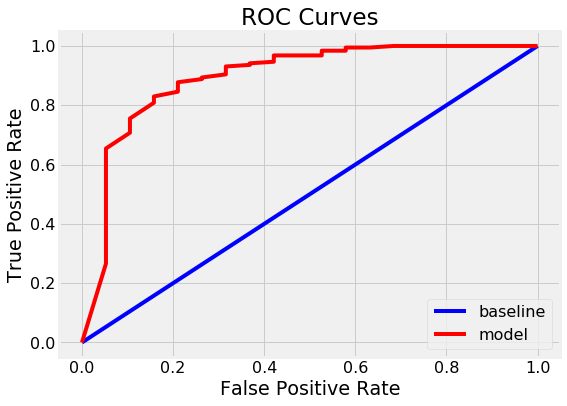

In [49]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

#### Confusion Matrix

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    # We can also use plt.cm.Blues
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if i == 0:
            plt.text(j, i+0.25, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black")
        elif i == 1:
            plt.text(j, i-0.25, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)   # since we don't need middle lines
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[  8  11]
 [  3 185]]


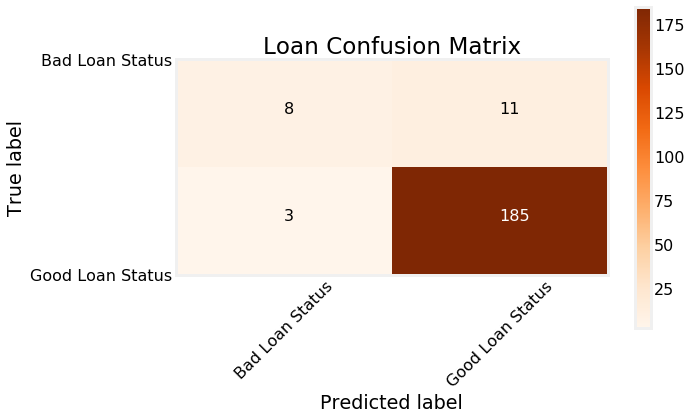

In [51]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes= ['Bad Loan Status', 'Good Loan Status'],
                      title = 'Loan Confusion Matrix')

In [52]:
feature_importance_model = pd.DataFrame({'feature': feature_list,
                                         'importance': model.feature_importances_}).sort_values('importance', ascending = False)
feature_importance_model.head(34)

,feature,importance
22,min6,0.106891
16,min4,0.087274
19,min5,0.079788
13,min3,0.062774
7,min1,0.049461
10,min2,0.048551
12,mean2,0.045335
2,amount,0.036374
1,date_loan,0.035713
21,mean5,0.035302


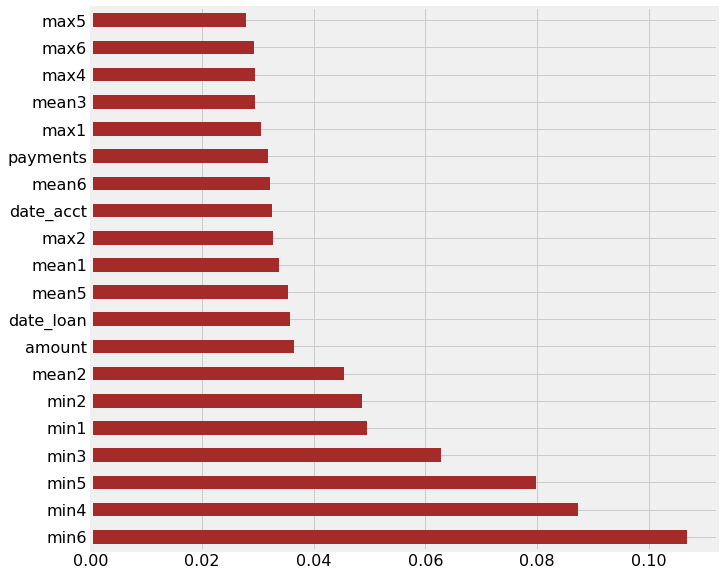

In [53]:
(pd.Series(model.feature_importances_, index=feature_list)
   .nlargest(20)
   .plot(kind='barh', figsize = (10,10), color='brown'))